<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable target).


#### Import libraries

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# models trainng

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from imblearn.over_sampling import SMOTE

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,make_scorer

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


####Load Data

In [27]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-additional-full.csv',sep=';')

In [28]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21693,44,management,married,university.degree,no,yes,no,cellular,aug,tue,61,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
12238,36,blue-collar,married,basic.9y,no,no,no,telephone,jul,thu,414,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
13761,27,admin.,single,high.school,no,yes,no,cellular,jul,thu,340,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2738,43,services,married,high.school,no,no,no,telephone,may,wed,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
380,30,blue-collar,single,unknown,no,no,no,telephone,may,tue,184,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,155,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
18849,30,admin.,married,university.degree,no,no,no,cellular,aug,mon,243,1,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
12053,39,self-employed,married,basic.6y,unknown,no,yes,telephone,jun,fri,213,1,999,0,nonexistent,1.4,94.465,-41.8,4.947,5228.1,no
29581,30,blue-collar,married,basic.4y,no,no,no,cellular,apr,mon,19,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
13325,28,services,single,university.degree,no,yes,no,cellular,jul,wed,90,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [29]:
#Update y variable to int type
dataset['y'].replace({'yes':1,'no':0},inplace=True)

In [30]:
#Rename y variable to 'target'
dataset.rename({'y':'target'},axis=1, inplace=True)

In [31]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
33464,47,blue-collar,married,basic.9y,no,no,no,cellular,may,tue,118,2,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
11657,33,services,single,high.school,no,no,no,telephone,jun,fri,15,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
29853,33,housemaid,married,basic.4y,no,yes,no,cellular,apr,mon,172,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
2857,40,services,married,high.school,unknown,yes,no,telephone,may,wed,248,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
677,56,management,married,university.degree,no,yes,no,telephone,may,tue,75,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
19912,30,technician,single,professional.course,no,yes,no,cellular,aug,fri,445,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
8884,45,housemaid,married,professional.course,unknown,yes,no,telephone,jun,thu,126,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
10534,30,blue-collar,divorced,basic.9y,no,no,yes,telephone,jun,tue,134,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
7379,33,self-employed,married,basic.6y,no,no,no,telephone,may,fri,648,5,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
29536,36,admin.,married,high.school,no,no,no,cellular,apr,mon,658,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0


#Exploratory data analysis

##Attribute information:

 Input variables:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - target - has the client subscribed a term deposit? (binary: "yes","no")

##Checking data type of variables

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Checking if there are any missing values

In [33]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

##Checking descriptive statistics

In [34]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


##Unique values per column

In [35]:
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

job --> 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital --> 4
['married' 'single' 'divorced' 'unknown']

education --> 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default --> 3
['no' 'unknown' 'yes']

housing --> 3
['no' 'yes' 'unknown']

loan --> 3
['no' 'yes' 'unknown']

contact --> 2
['telephone' 'cellular']

month --> 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week --> 5
['mon' 'tue' 'wed' 'thu' 'fri']

duration --> 1544
[ 261  149  226 ... 1246 1556 1868]

campaign --> 42
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 

##Checking correlation between variables

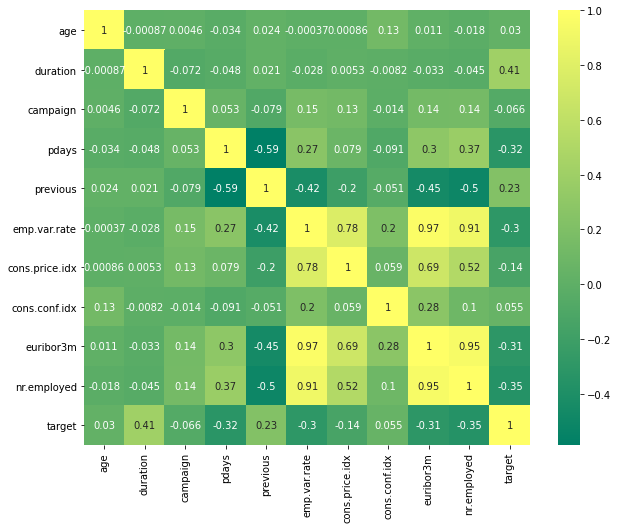

In [36]:
corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='summer');

##Checking ratio target variable

Target variable

In [37]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.887346
1    0.112654
Name: target, dtype: float64

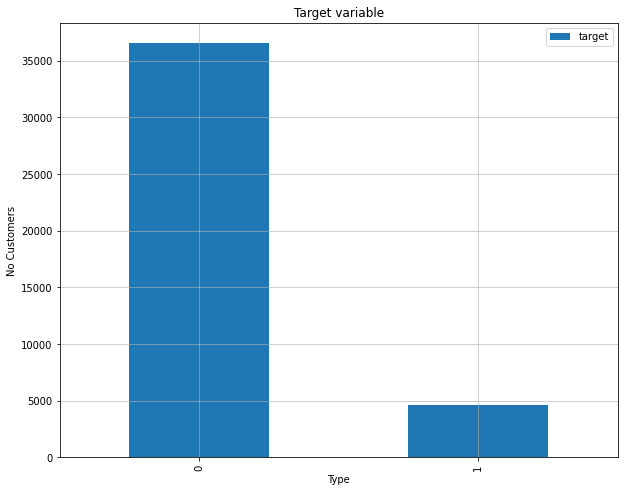

In [38]:
plt.figure(figsize=(10,8))
dataset['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.ylabel('No Customers')
plt.xlabel('Type')
plt.legend()
plt.grid(axis='both', alpha=0.75);

Conculsion

Out dataset is highly impbalaced. There are only 11% of customers who have aleardy taken a bank term offer.


##Checking variables 

 Variables

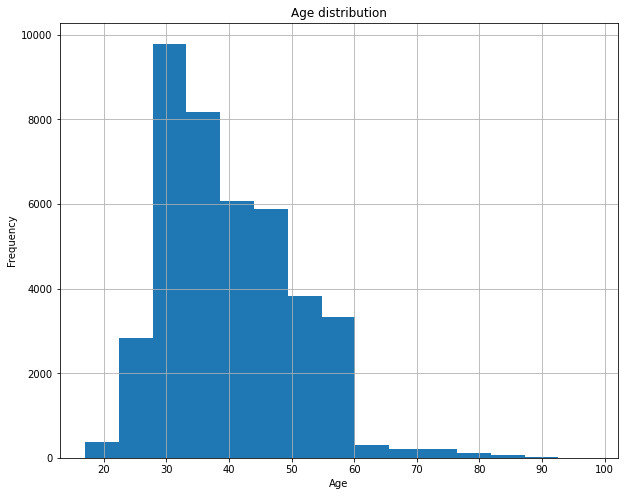

In [39]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution');

###Plotting variables to check thier distribiution

In [40]:
def plot_variables(var):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,data=dataset,order=order)
  plt.title(f'{var} distribution'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

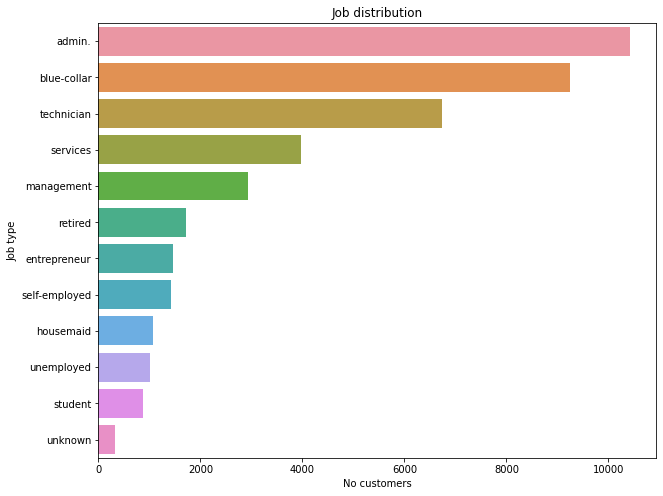

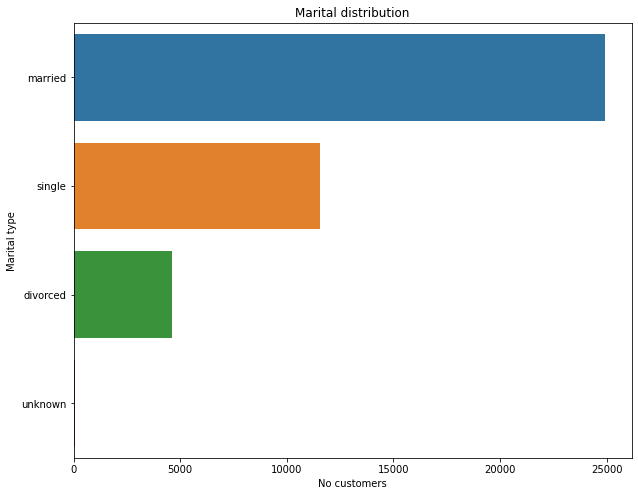

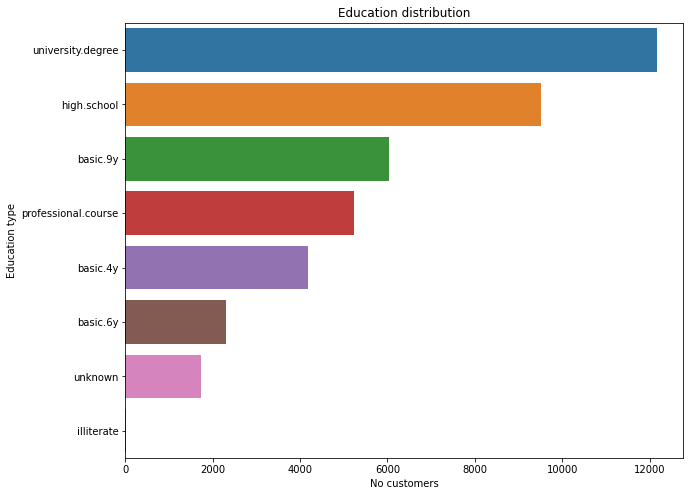

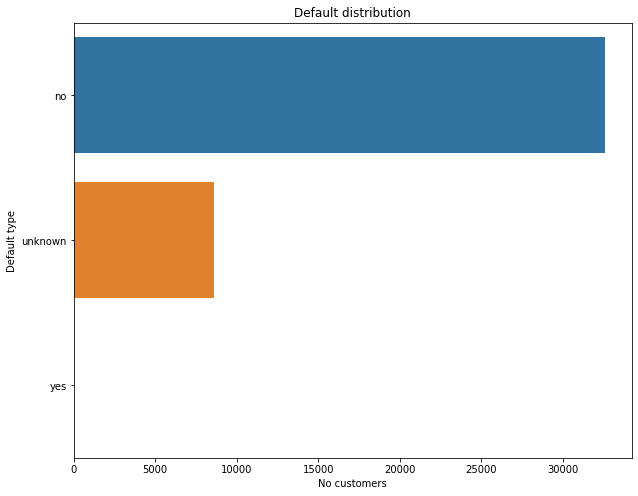

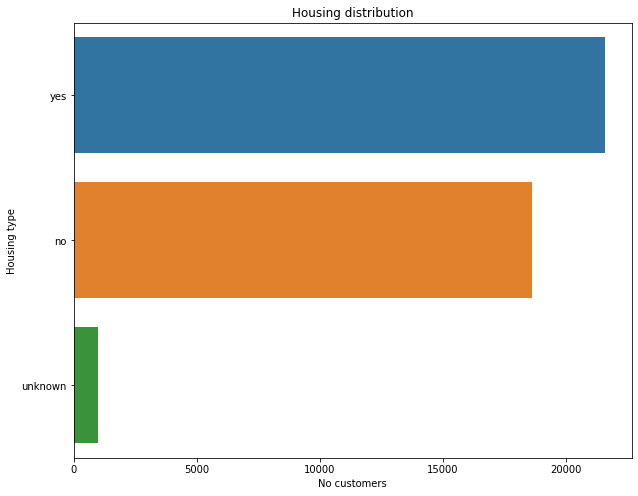

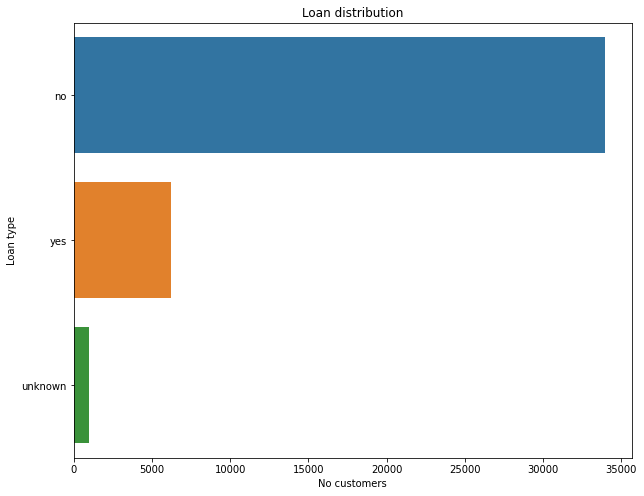

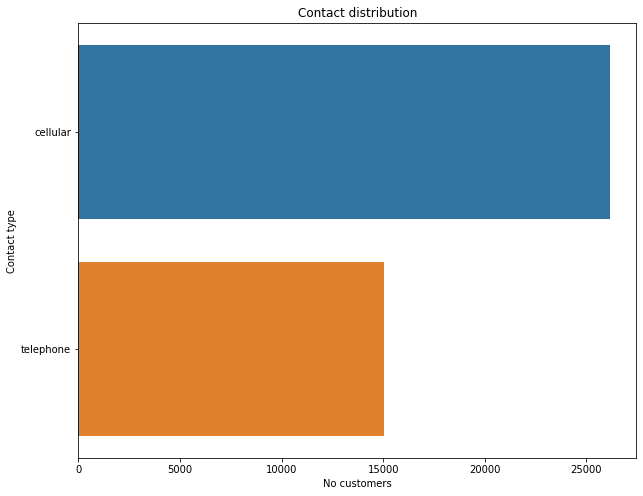

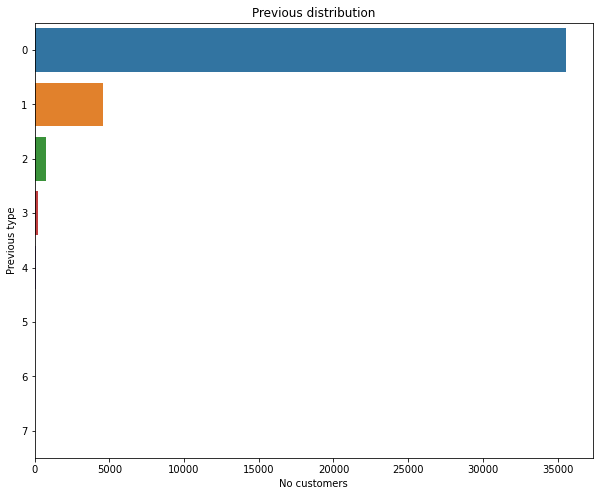

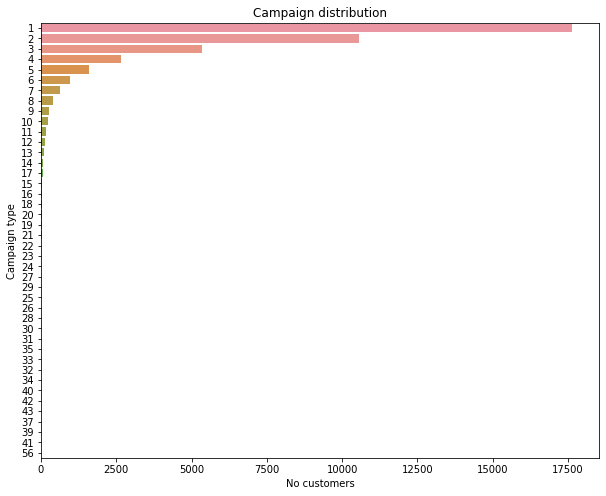

In [41]:
dataset.columns
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variables(var) for var in vars];

###Plotting variables by target

In [42]:
def plot_variablesByTarget(var,target):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,hue=target,data=dataset,order=order)
  plt.title(f'{var} distribution divided by target variable'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

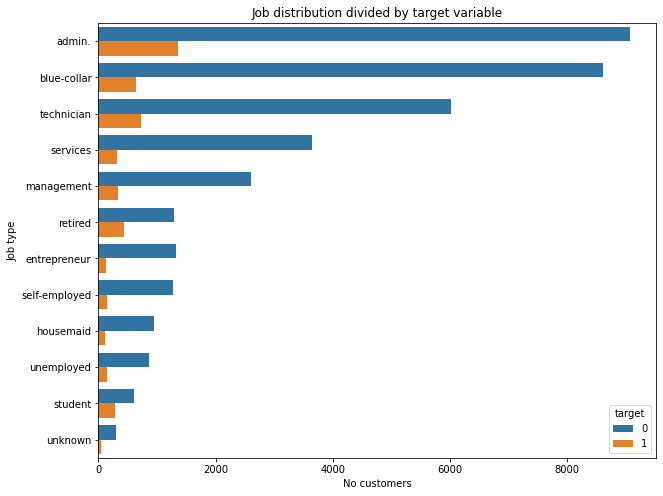

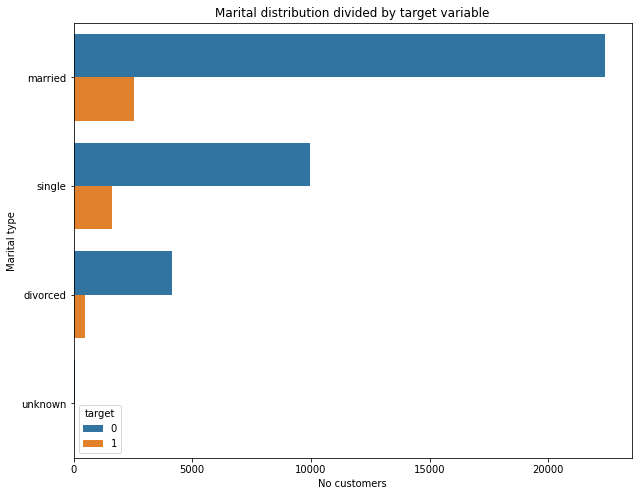

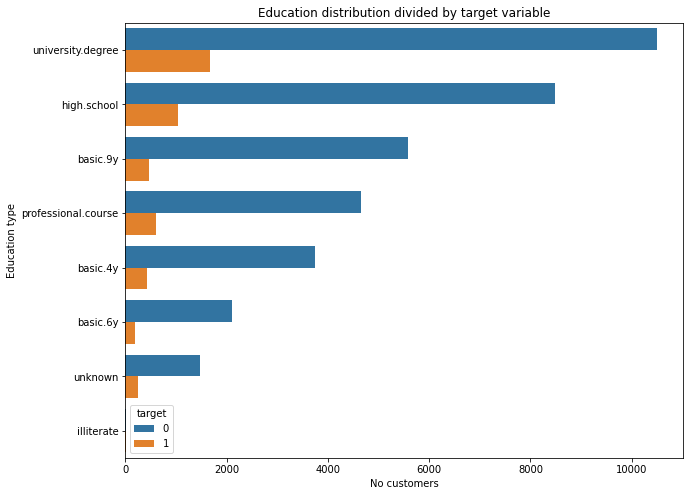

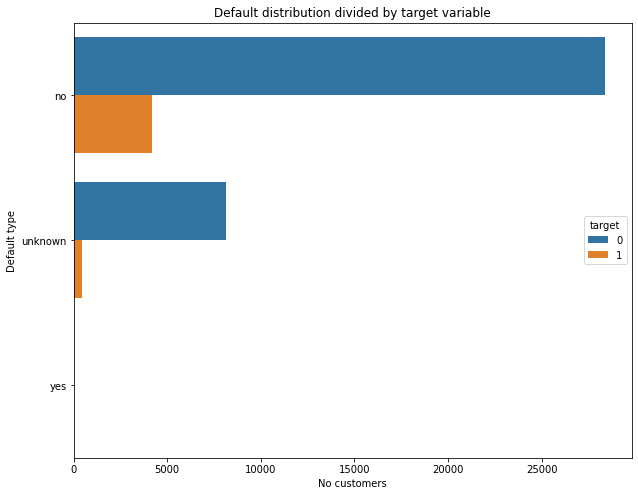

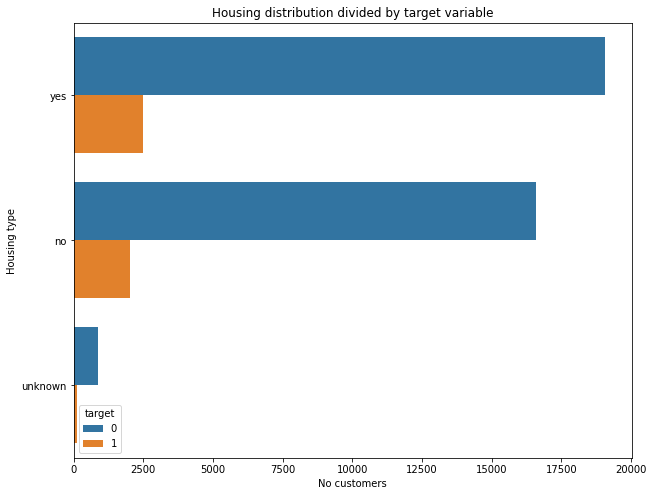

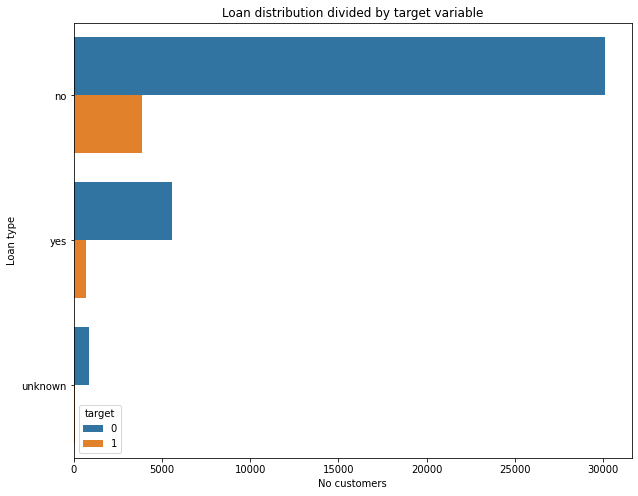

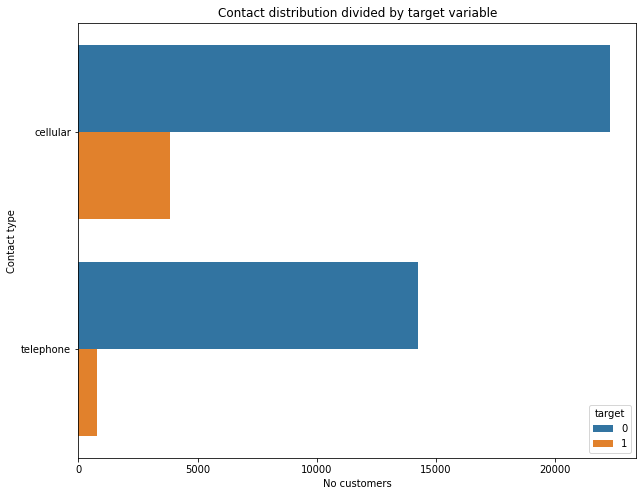

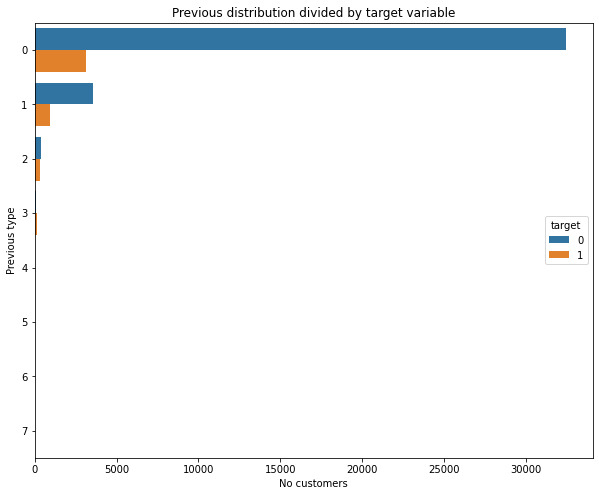

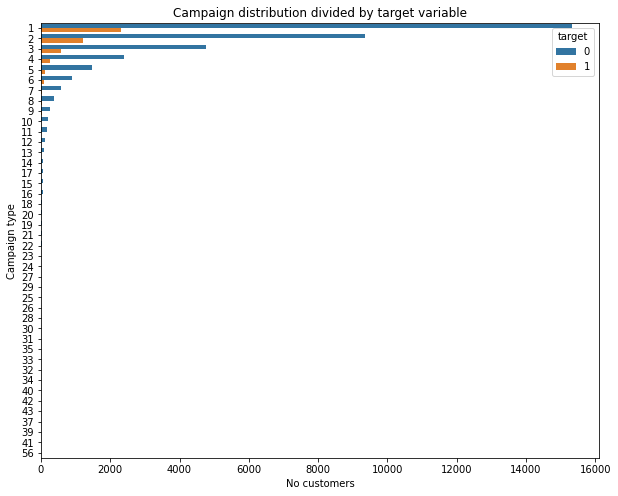

In [43]:
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variablesByTarget(var,'target') for var in vars];

###Checking variables divided by type

In [44]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

Numeric columns

In [45]:
numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

Non numeric columns

In [46]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [47]:
def plot_num_variablesByType(): 
  for column in numeric_columns:

    print(f'Column name: {column}')
    print(f'Unique values: {len(dataset[column].unique())}')
    dataset[column].plot.hist(bins=20)
    plt.show()

Plotting numeric columns

Column name: age
Unique values: 78


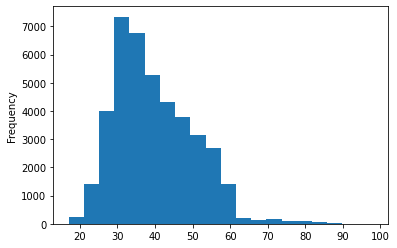

Column name: duration
Unique values: 1544


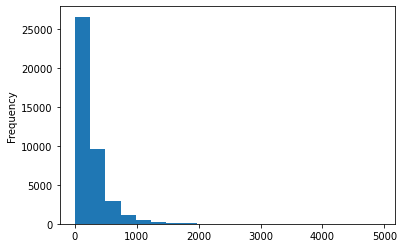

Column name: campaign
Unique values: 42


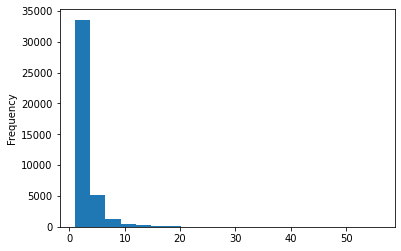

Column name: pdays
Unique values: 27


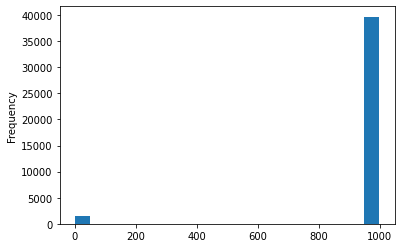

Column name: previous
Unique values: 8


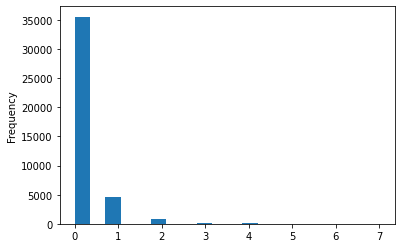

Column name: emp.var.rate
Unique values: 10


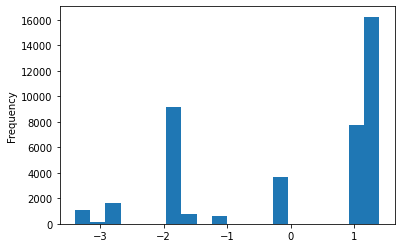

Column name: cons.price.idx
Unique values: 26


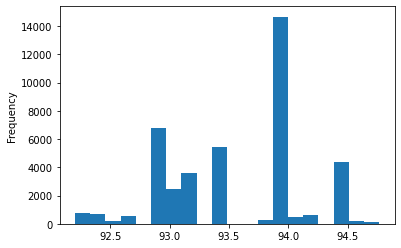

Column name: cons.conf.idx
Unique values: 26


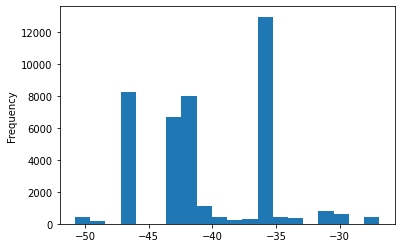

Column name: euribor3m
Unique values: 316


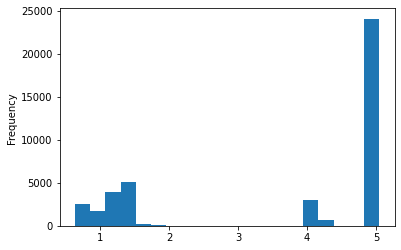

Column name: nr.employed
Unique values: 11


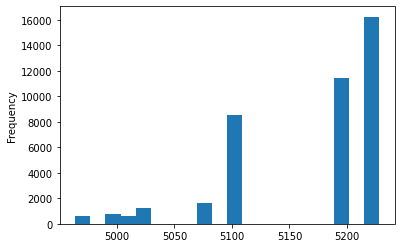

Column name: target
Unique values: 2


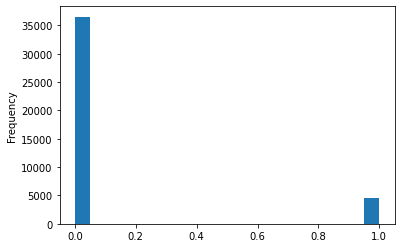

In [48]:
plot_num_variablesByType()

Plotting non numeric columns

In [49]:
def plot_non_num_variablesByType():
  for column in non_numeric_columns:
    print(f'Column name: {column}')
    print(f'Unique values:{len(dataset[column].unique())}')
    dataset[column].value_counts().plot.bar()
    plt.show()

Column name: job
Unique values:12


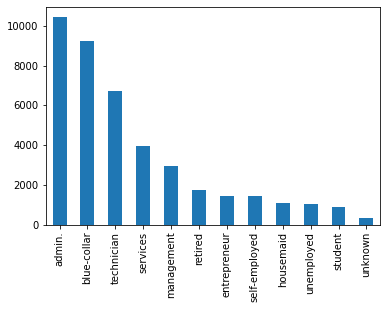

Column name: marital
Unique values:4


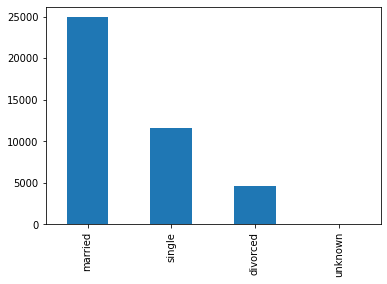

Column name: education
Unique values:8


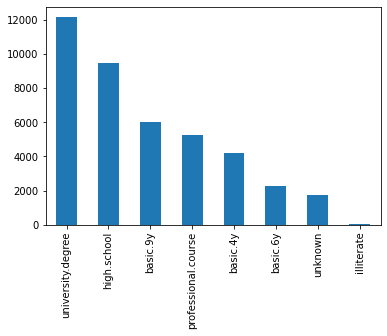

Column name: default
Unique values:3


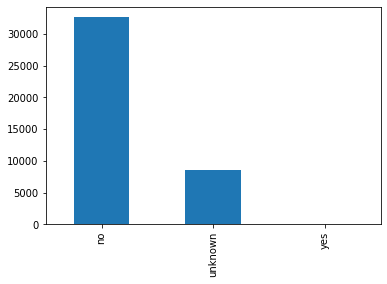

Column name: housing
Unique values:3


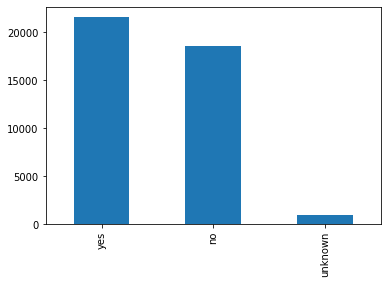

Column name: loan
Unique values:3


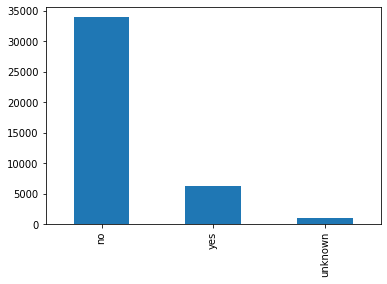

Column name: contact
Unique values:2


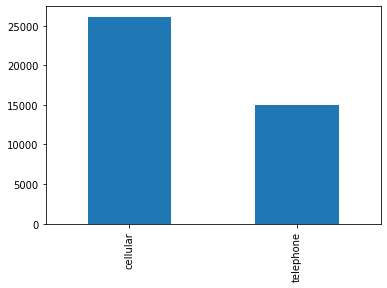

Column name: month
Unique values:10


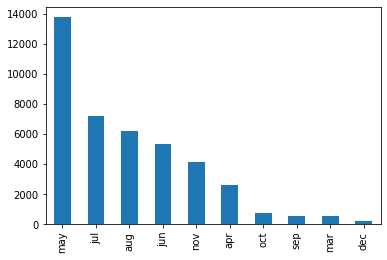

Column name: day_of_week
Unique values:5


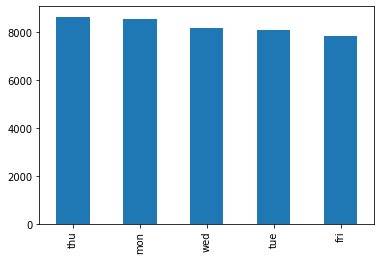

Column name: poutcome
Unique values:3


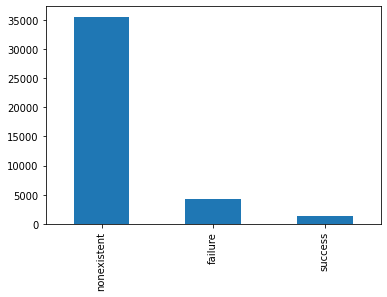

In [50]:
plot_non_num_variablesByType()

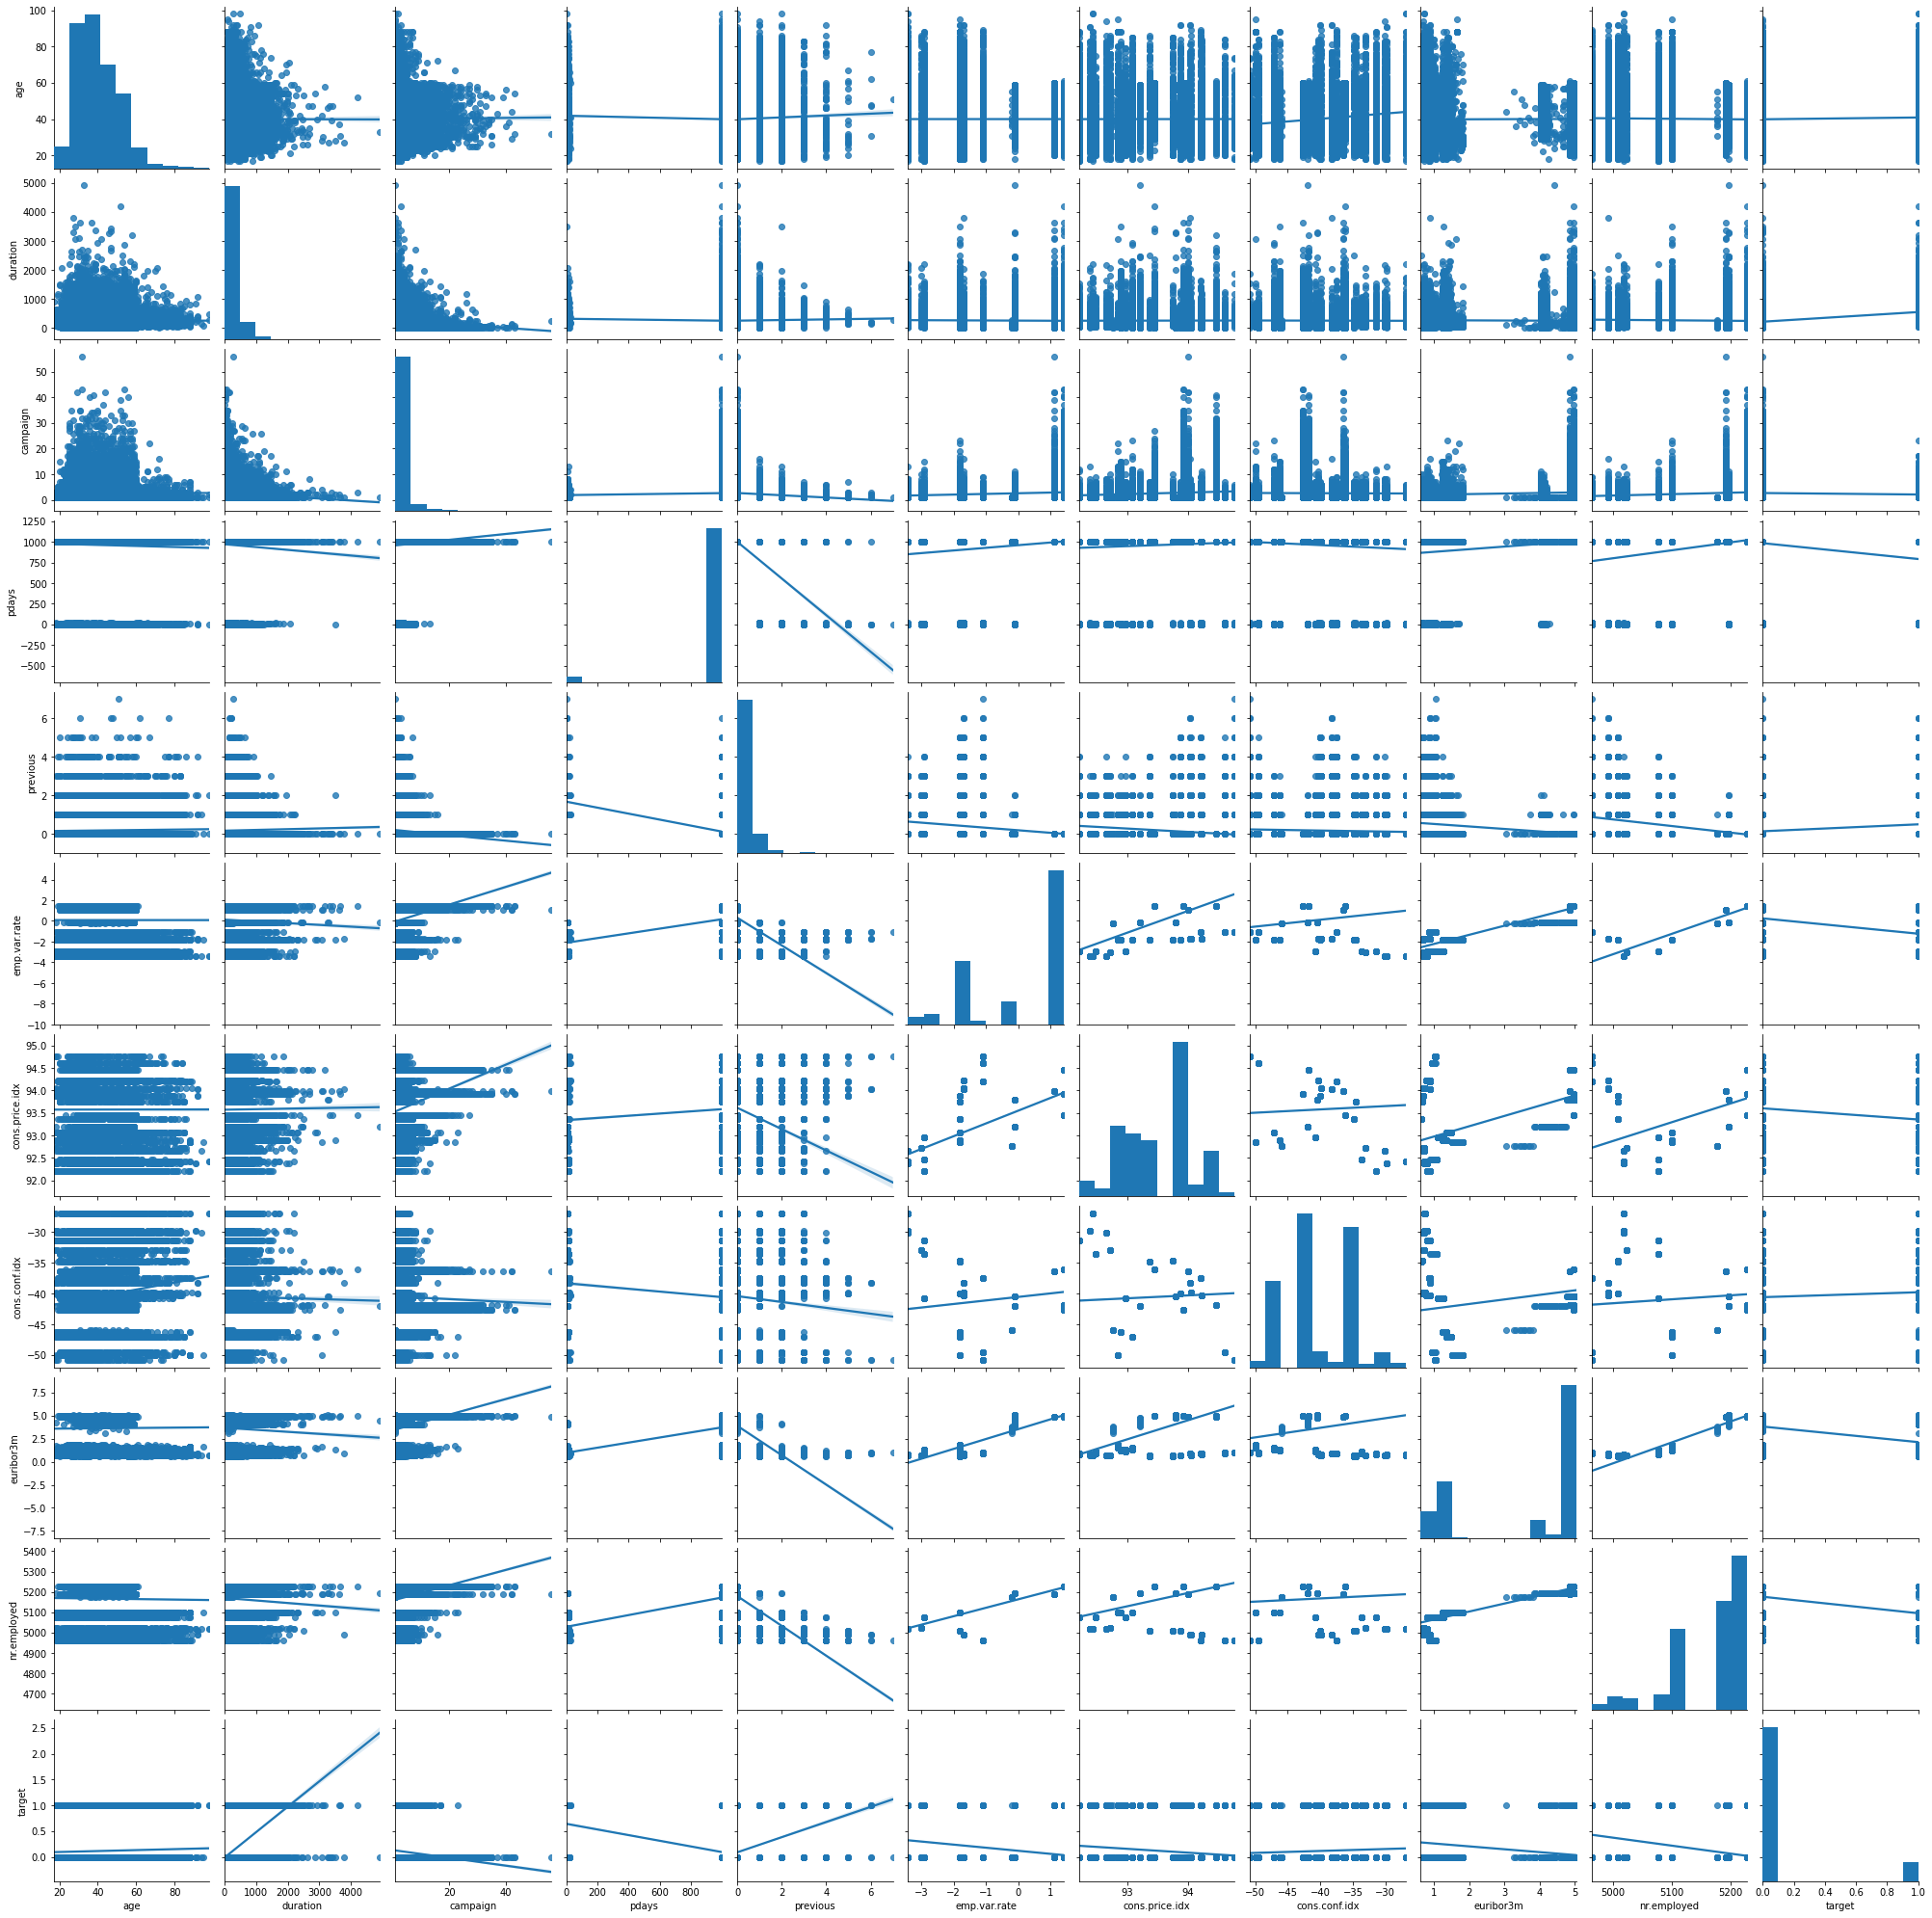

In [ ]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding

#Data Preperation

Categorical Columns

Checking how does look like distribution of each category

In [51]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [52]:
for column in non_numeric_columns:
  print(f'Column name: {column}')
  print()
  print(dataset[column].value_counts())
  print()
  print("Category share (%)")
  print(dataset[column].value_counts()/dataset['job'].count()*100)
  print()

Column name: job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Category share (%)
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

Column name: marital

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Category share (%)
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

Column name: education

university.degree      121

#### Converting categorical attributes into numbers

In [53]:
dataset.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
24564,42,admin.,divorced,university.degree,no,yes,no,cellular,nov,mon,199,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
29664,40,management,married,university.degree,no,yes,no,cellular,apr,mon,96,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0
22236,29,admin.,single,high.school,no,yes,no,cellular,aug,thu,788,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,1
38146,56,management,divorced,university.degree,no,no,no,cellular,sep,tue,277,1,999,1,failure,-3.4,92.379,-29.8,0.750,5017.5,1
14939,29,admin.,single,university.degree,no,yes,no,cellular,jul,wed,77,6,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


In [54]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [55]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [56]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

# Data Cleaning

#### Drop not used columns

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [58]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [59]:
dataset.drop(['duration','default'],axis=1,inplace=True)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

#Feature Engineering

Let's check if we are able to simplify a bit our categories

In [61]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

1          21576
0          18622
unknown      990
Name: housing, dtype: int64

0          33950
1           6248
unknown      990
Name: loan, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar    

In [62]:
dataset['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic'}, inplace=True)

dataset['job'].replace({
                        'entrepreneur':'self-employed','admin.':'admin&management'
                        ,'management':'admin&management','retired':'non-active','unemployed':'non-active'},inplace=True)

dataset['marital'].replace({'divorced':'single'},inplace=True)



In [63]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin&management    13346
blue-collar          9254
technician           6743
services             3969
self-employed        2877
non-active           2734
housemaid            1060
student               875
unknown               330
Name: job, dtype: int64

married    24928
single     16180
unknown       80
Name: marital, dtype: int64

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

1          21576
0          18622
unknown      990
Name: housing, dtype: int64

0          33950
1           6248
unknown      990
Name: loan, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_we

#Modeling

Before we start doing predictions we have to convert categorical variabels into numbers

In [64]:
dataset = pd.get_dummies(data=dataset,
                         columns=['housing','loan','job','marital','education','contact','month','day_of_week','poutcome'],
                         prefix_sep='_',drop_first=True)

In [65]:
dataset.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,housing_1,housing_unknown,loan_1,loan_unknown,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_services,job_student,job_technician,job_unknown,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
23518,41,5,999,0,1.4,93.444,-36.1,4.962,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12617,25,2,999,0,1.4,93.918,-42.7,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
25201,55,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
38125,70,1,999,0,-3.4,92.379,-29.8,0.741,5017.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
11973,52,1,999,0,1.4,94.465,-41.8,4.958,5228.1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
26247,47,3,999,0,-0.1,93.200,-42.0,4.076,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
14700,40,5,999,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
20357,52,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3422,32,4,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1237,41,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [66]:
features = dataset.columns
features= features.drop('target').tolist()
features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'housing_1',
 'housing_unknown',
 'loan_1',
 'loan_unknown',
 'job_blue-collar',
 'job_housemaid',
 'job_non-active',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unknown',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

Let's define model variables

In [67]:
X = dataset[features]
X = np.array(X)
y = np.array(dataset['target'])

Let's create a function to run different modeling scenarios

In [68]:
def model_processing(scenario,X_train,X_test,y_train,y_test):
  

  seed=123
  kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

  pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

  param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
  }

  grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True,scoring='f1')

  grid.fit(X_train, y_train)


  pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

  param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
  }

  grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True,scoring='f1')

  grid_2.fit(X_train, y_train)

  pipe_3 = Pipeline([
                   ('classifier', DecisionTreeClassifier())])

  param_grid_3 = {
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
  }


  grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

  grid_3.fit(X_train, y_train)


  pipe_4 = Pipeline([
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

  param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

  grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

  grid_4.fit(X_train, y_train)

  pipe_5 = Pipeline([ 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

  param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

  grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

  grid_5.fit(X_train, y_train)

  
  pipe_6 = Pipeline([ 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

  param_grid_6 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

  grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

  grid_6.fit(X_train, y_train)

  pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


  param_grid_7 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

  grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

  grid_7.fit(X_train, y_train)


  pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


  param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

  grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

  grid_8.fit(X_train, y_train)

  models = []

  models_params.append((scenario,'LogisticRegression',grid.best_params_))
  models_params.append((scenario,'SVM linear',grid_2.best_params_))
  models_params.append((scenario,'DecisionTreeClassifier',grid_3.best_params_))
  models_params.append((scenario,'RandomForestClassifier',grid_4.best_params_))
  models_params.append((scenario,'BaggingClassifier',grid_5.best_params_))
  models_params.append((scenario,'ExtraTreesClassifier',grid_6.best_params_))
  models_params.append((scenario,'GradientBoostingClassifier',grid_7.best_params_))
  models_params.append((scenario,'xgboost',grid_8.best_params_))

  models.append((scenario,'LogisticRegression',grid.best_estimator_))
  models.append((scenario,'SVM linear',grid_2.best_estimator_))
  models.append((scenario,'DecisionTreeClassifier',grid_3.best_estimator_))
  models.append((scenario,'RandomForestClassifier',grid_4.best_estimator_))
  models.append((scenario,'BaggingClassifier',grid_5.best_estimator_))
  models.append((scenario,'ExtraTreesClassifier',grid_6.best_estimator_))
  models.append((scenario,'GradientBoostingClassifier',grid_7.best_estimator_))
  models.append((scenario,'xgboost',grid_8.best_estimator_))

  

  for scenario,name, model in models:
    if scenario == scenario:
      precision_score.append((scenario,name,metrics.precision_score(y_test , model.predict(X_test),zero_division=1)))
      recall_score.append((scenario,name,metrics.recall_score(y_test , model.predict(X_test))))
      f1_score.append((scenario,name, metrics.f1_score(y_test , model.predict(X_test))))
      accuracy_score.append((scenario,name,metrics.accuracy_score(y_test , model.predict(X_test))))
      if (name == 'SVM linear'):
        roc_auc_score.append((scenario,name,metrics.roc_auc_score(y_test , model.decision_function(X_test))))
      else:
        roc_auc_score.append((scenario,name,metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1])))
    else:
      pass
  
  models_result.append(models)


Creating lists to collect funcion output

In [69]:
models_params = []
models_result = []

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

I am going to test few different approach to check which solution allows to build the best classifier.

#Unbalanced data

Let's test classifiers using unbalanced target variable

In [70]:
#Train Test split 
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split( X, y, test_size=0.3, random_state=123)

In [71]:
model_processing('Unbalanced data',X_train_unbalanced,X_test_unbalanced,y_train_unbalanced,y_test_unbalanced)

#SMOTE

The target variable was highly unbalanced.

I decided to use technique known as SMOTE: Synthetic Minority Over-sampling Technique for oversampling imbalanced classification datasets to check if it improves modelinng results.

In [72]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote= train_test_split( X, y, test_size=0.3, random_state=123)

smt =  SMOTE()

X_train_sm, y_train_sm = smt.fit_sample(X_train_smote,y_train_smote,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [76]:
print(np.bincount(y_train_sm))

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train_smote,y_train_smote)

y_pred = lr.predict(X_test_smote)

[25587 25587]


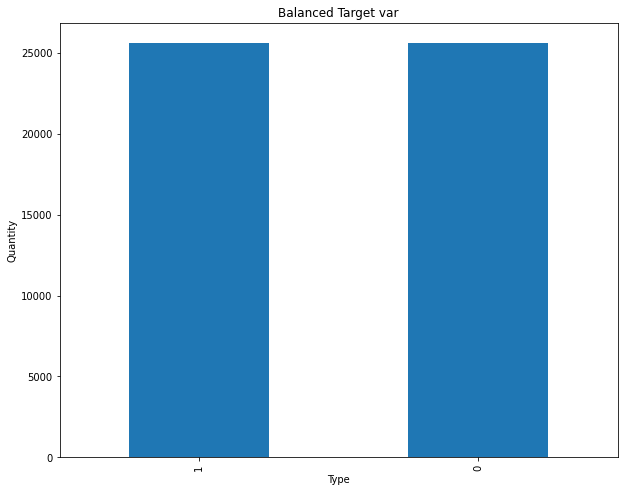

In [77]:
plt.figure(figsize=(10,8))
pd.Series(y_train_sm).value_counts().plot(kind='bar')
plt.title('Balanced Target var')
plt.xlabel('Type')
plt.ylabel('Quantity');

In [78]:
model_processing('SMOTE',X_train_sm,X_test_smote,y_train_sm,y_test_smote)

#Upsampled

Upsampling can be defined as adding more copies of the minority class. 
It can be a good choice when you don’t have a ton of data to work with.
I will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

In [79]:
X = dataset[features]

y = dataset['target']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)

X = pd.concat([X_train, y_train], axis=1)

#We split the imbalanced dataset into 2 separate datasets
df_majority = X[X.target==0]
df_minority = X[X.target==1]

#Then upsampling the minority class

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)

#And join two datasets
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.target.value_counts()

1    25587
0    25587
Name: target, dtype: int64

In [80]:
X_train_upsampled = df_upsampled.drop('target', axis=1)
y_train_upsampled = df_upsampled['target']

In [81]:
model_processing('Upsampled data',X_train_upsampled,X_test,y_train_upsampled,y_test)

#Downsampled

Downsampling can be defined as removing some observations of the majority class.

In [82]:
# Let's now test if downsampling give us better results
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
#Join two datasets
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

df_downsampled.target.value_counts()

1    3244
0    3244
Name: target, dtype: int64

In [83]:
y_train_downsamp = df_downsampled.target
X_train_downsamp = df_downsampled.drop('target', axis=1)

In [84]:
model_processing('downsampled data',X_train_downsamp,X_test,y_train_downsamp,y_test)

#New Customers

As in dataset there are columns (pdays, previous) which identify if particular customer is a new one or existing I will split customers into two groups to check how model works only for those who are new or existin customers.

Column pdays says that when is 999 it is a new client


In [85]:
df_new_customers = dataset.loc[dataset['pdays']==999]
df_new_customers['target'].value_counts()

0    36000
1     3673
Name: target, dtype: int64

In [86]:
X_new = df_new_customers.drop('target',axis=1)


In [87]:
y_new = np.array(df_new_customers['target'])

In [88]:
X_train_new_cust, X_test_new_cust, y_train_new_cust, y_test_new_cust = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

In [89]:
model_processing('New Customers',X_train_new_cust,X_test_new_cust,y_train_new_cust,y_test_new_cust)

#Current Customers

Now I take into account only existing customer to check how well model can predict if they take bank term.

In [90]:
df_current_customers = dataset.loc[dataset['pdays']!=999]
df_current_customers['target'].value_counts()

1    967
0    548
Name: target, dtype: int64

In [91]:
X_curr = np.array(df_current_customers.drop('target',axis=1))
X_curr.shape

(1515, 44)

In [92]:
y_curr = np.array(df_current_customers['target'])
y_curr.shape

(1515,)

In [93]:
X_train_curr_cust, X_test_curr_cust, y_train_curr_cust, y_test_curr_cust = train_test_split(X_curr, y_curr, test_size=0.3, random_state=123)

In [94]:
model_processing('Current Customers',X_train_curr_cust,X_test_curr_cust,y_train_curr_cust,y_test_curr_cust)

#Models Best Params

In [95]:
pd.DataFrame(models_params,columns=['Scenario','Model','Best Params'])

,Scenario,Model,Best Params
0,Unbalanced data,LogisticRegression,{'classifier__C': 100}
1,Unbalanced data,SVM linear,{'classifier__C': 100}
2,Unbalanced data,DecisionTreeClassifier,"{'classifier__max_depth': 9, 'classifier__max_..."
3,Unbalanced data,RandomForestClassifier,"{'classifier__max_depth': 10, 'classifier__max..."
4,Unbalanced data,BaggingClassifier,"{'classifier__max_samples': 20, 'classifier__n..."
5,Unbalanced data,ExtraTreesClassifier,"{'classifier__max_depth': 10, 'classifier__max..."
6,Unbalanced data,GradientBoostingClassifier,"{'classifier__learning_rate': 0.2, 'classifier..."
7,Unbalanced data,xgboost,"{'classifier__learning_rate': 0.1, 'classifier..."
8,SMOTE,LogisticRegression,{'classifier__C': 0.1}
9,SMOTE,SVM linear,{'classifier__C': 0.01}


#Models Comparison

Due to the fact classes are unbalances **accuracy** is not a good metric to measure prediction performance. 

Focusing on F1 and ROC-AUC is better solution.

In [96]:
precision = pd.DataFrame(precision_score,columns=['Scenario','Model','Precision'])
recall = pd.DataFrame(recall_score,columns=['Scenario','Model','Recall'])
f1 = pd.DataFrame(f1_score,columns=['Scenario','Model','F1'])
accuracy = pd.DataFrame(accuracy_score,columns=['Scenario','Model','Accuracy'])
roc_auc = pd.DataFrame(roc_auc_score,columns=['Scenario','Model','ROC_AUC'])
results = precision.merge(recall,on=['Scenario','Model']).merge(f1, on = ['Scenario','Model']).merge(accuracy,on=['Scenario','Model']).merge(roc_auc,on=['Scenario','Model'])
results

,Scenario,Model,Precision,Recall,F1,Accuracy,ROC_AUC
0,Unbalanced data,LogisticRegression,0.683992,0.235673,0.350559,0.901351,0.798049
1,Unbalanced data,SVM linear,0.203410,0.247851,0.223442,0.805373,0.537785
2,Unbalanced data,DecisionTreeClassifier,0.655512,0.238539,0.349790,0.899814,0.790423
3,Unbalanced data,RandomForestClassifier,0.734417,0.194126,0.307082,0.901028,0.795703
4,Unbalanced data,BaggingClassifier,0.714286,0.003582,0.007128,0.887270,0.762978
5,Unbalanced data,ExtraTreesClassifier,0.729659,0.199140,0.312887,0.901190,0.793352
6,Unbalanced data,GradientBoostingClassifier,0.641711,0.257880,0.367910,0.899895,0.803040
7,Unbalanced data,xgboost,0.691532,0.245702,0.362579,0.902403,0.803533
8,SMOTE,LogisticRegression,0.337403,0.653295,0.444987,0.815894,0.797538
9,SMOTE,SVM linear,0.335290,0.654728,0.443474,0.814356,0.796685


#ROC curve evaluation for tested scenarios

In [97]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [98]:
def plot_tpr_fpr(model_result_idx,X_test,y_test):

  plt.figure(figsize=(18, 16))
  for scenario,name, model in models_result[model_result_idx]:
      print((scenario ,name))
      if (name == 'SVM linear'):
          y_scores = model.decision_function(X_test)
      else: 
          y_scores = model.predict_proba(X_test)[:,1]        
      fpr, tpr, thresholds = roc_curve(y_test, y_scores)
      plot_roc_curve(fpr, tpr, (scenario ,name))

  plt.legend(loc="lower right", fontsize=16)
  plt.show()

In [99]:
Xt=[]
yt=[]

In [100]:
Xt.append(X_test_unbalanced)
Xt.append(X_test_smote)
Xt.append(X_test)
Xt.append(X_test)
Xt.append(X_test_new_cust)
Xt.append(X_test_curr_cust)

In [101]:
yt.append(y_test_unbalanced)
yt.append(y_test_smote)
yt.append(y_test)
yt.append(y_test)
yt.append(y_test_new_cust)
yt.append(y_test_curr_cust)

('Unbalanced data', 'LogisticRegression')
('Unbalanced data', 'SVM linear')
('Unbalanced data', 'DecisionTreeClassifier')
('Unbalanced data', 'RandomForestClassifier')
('Unbalanced data', 'BaggingClassifier')
('Unbalanced data', 'ExtraTreesClassifier')
('Unbalanced data', 'GradientBoostingClassifier')
('Unbalanced data', 'xgboost')


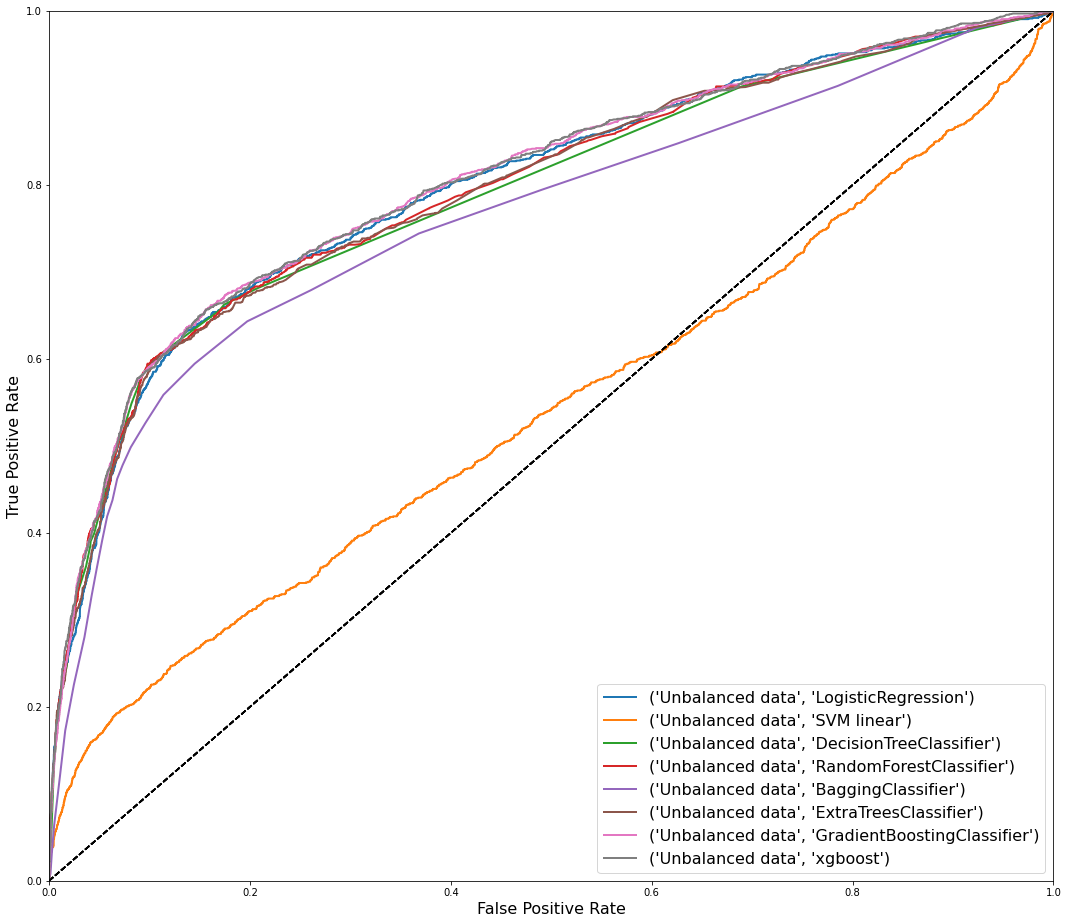

('SMOTE', 'LogisticRegression')
('SMOTE', 'SVM linear')
('SMOTE', 'DecisionTreeClassifier')
('SMOTE', 'RandomForestClassifier')
('SMOTE', 'BaggingClassifier')
('SMOTE', 'ExtraTreesClassifier')
('SMOTE', 'GradientBoostingClassifier')
('SMOTE', 'xgboost')


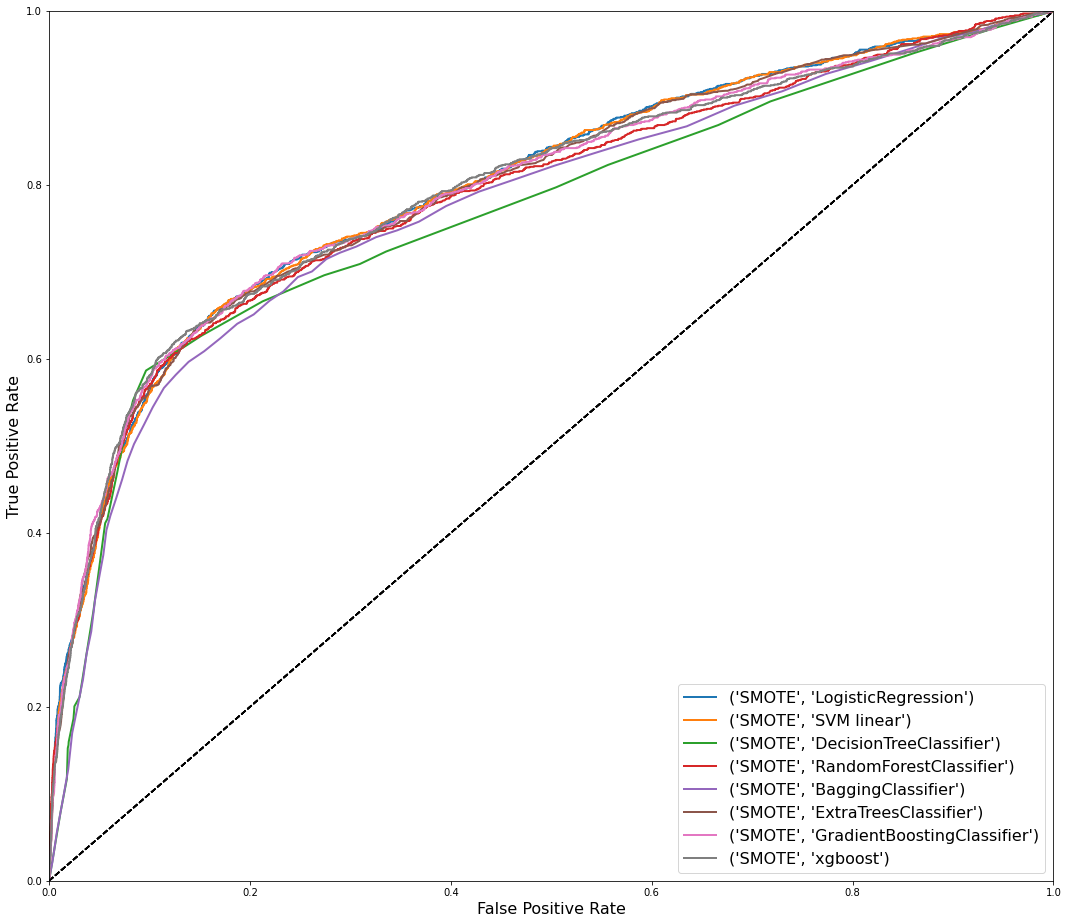

('Upsampled data', 'LogisticRegression')
('Upsampled data', 'SVM linear')
('Upsampled data', 'DecisionTreeClassifier')
('Upsampled data', 'RandomForestClassifier')
('Upsampled data', 'BaggingClassifier')
('Upsampled data', 'ExtraTreesClassifier')
('Upsampled data', 'GradientBoostingClassifier')
('Upsampled data', 'xgboost')


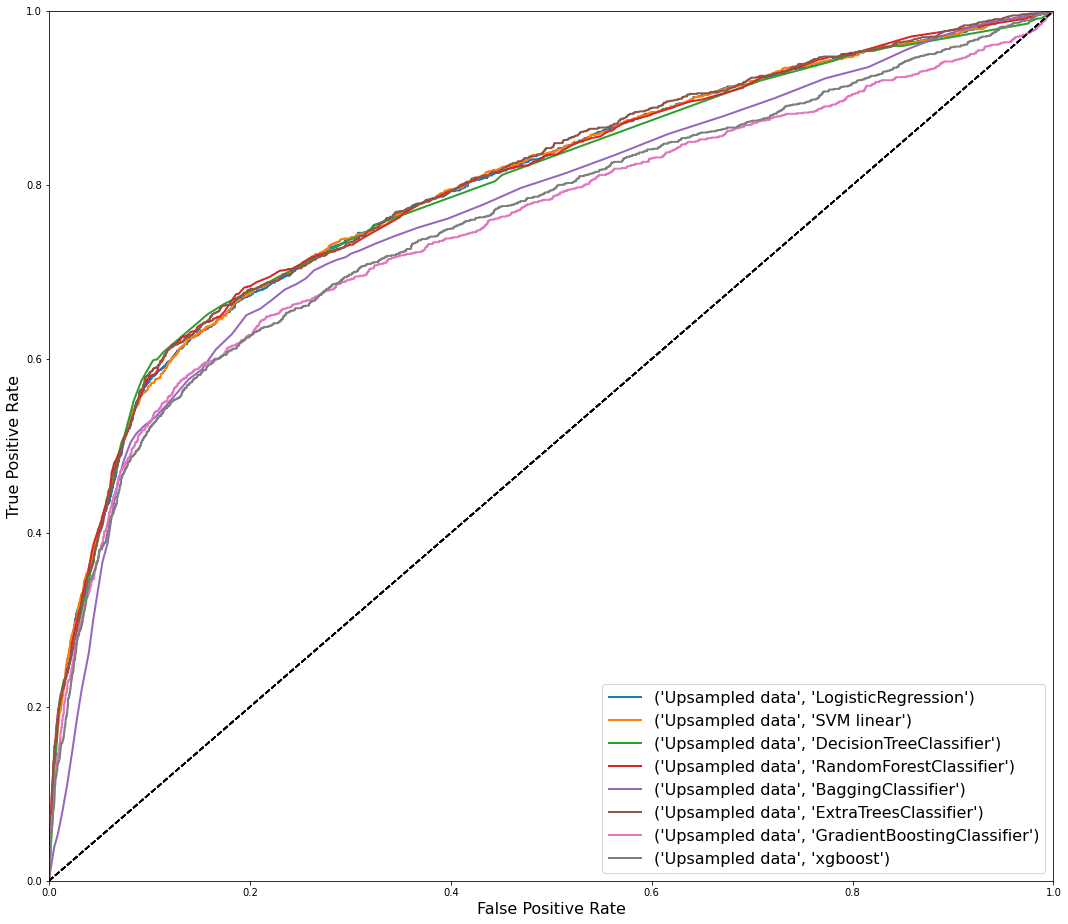

('downsampled data', 'LogisticRegression')
('downsampled data', 'SVM linear')
('downsampled data', 'DecisionTreeClassifier')
('downsampled data', 'RandomForestClassifier')
('downsampled data', 'BaggingClassifier')
('downsampled data', 'ExtraTreesClassifier')
('downsampled data', 'GradientBoostingClassifier')
('downsampled data', 'xgboost')


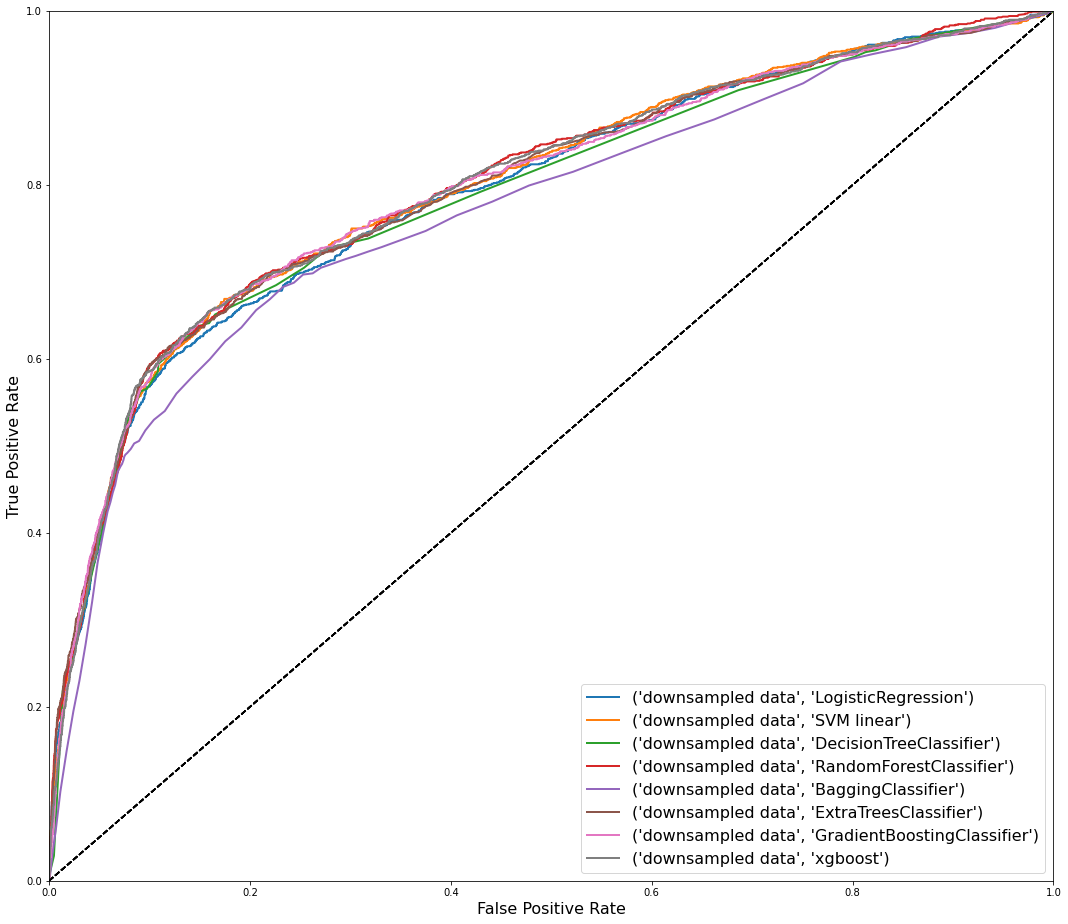

('New Customers', 'LogisticRegression')
('New Customers', 'SVM linear')
('New Customers', 'DecisionTreeClassifier')
('New Customers', 'RandomForestClassifier')
('New Customers', 'BaggingClassifier')
('New Customers', 'ExtraTreesClassifier')
('New Customers', 'GradientBoostingClassifier')
('New Customers', 'xgboost')


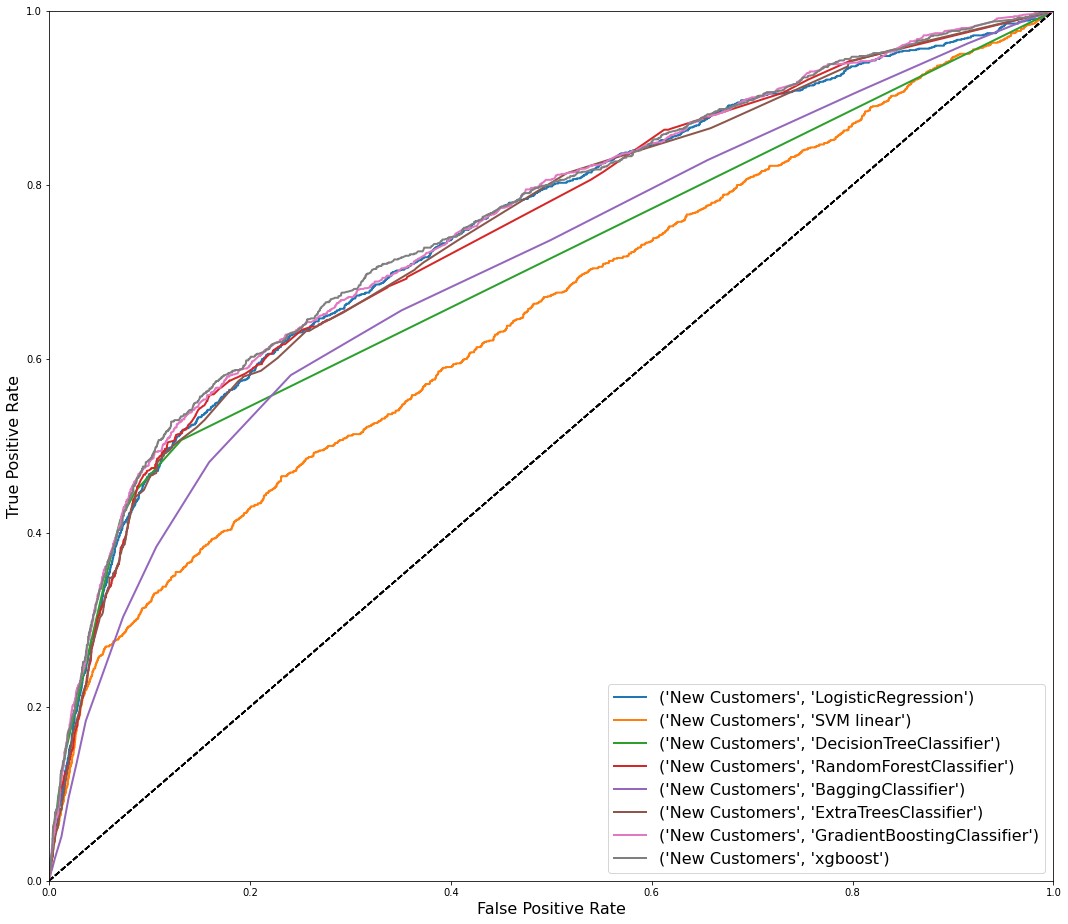

('Current Customers', 'LogisticRegression')
('Current Customers', 'SVM linear')
('Current Customers', 'DecisionTreeClassifier')
('Current Customers', 'RandomForestClassifier')
('Current Customers', 'BaggingClassifier')
('Current Customers', 'ExtraTreesClassifier')
('Current Customers', 'GradientBoostingClassifier')
('Current Customers', 'xgboost')


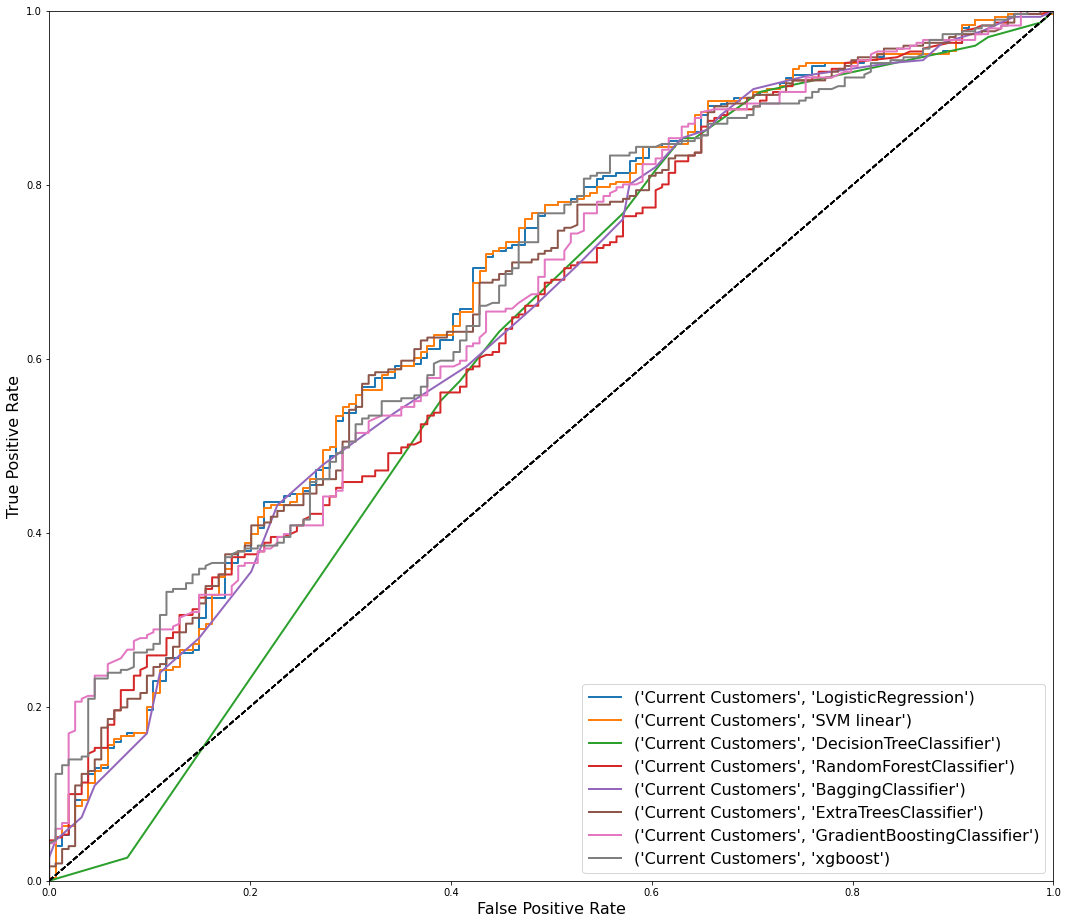

In [103]:
for i in range(len(Xt)):
  for x in enumerate(Xt):
    for y in enumerate(yt):
      if i == x[0] and i == y[0]:
        plot_tpr_fpr(i,x[1],y[1])

#Conclusions

Best performnce has been done for Current Customer scenario. 

F1 score gives better results compering with other case studies.

The modeling idea of focusing on existing clients got good results.

Best score is done by **ExtraTreesClassifier**

In [104]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

pipe_best_model = Pipeline([
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_best_model = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_best_model = GridSearchCV(pipe_best_model, param_grid_best_model, cv=kfold, return_train_score=True)

grid_best_model.fit(X_train_curr_cust, y_train_curr_cust)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        ExtraTreesClassifier(bootstrap=False,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=16,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_s

In [105]:
y_pred = grid_best_model.predict(X_test_curr_cust)

In [106]:
print(classification_report(y_test_curr_cust,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.29      0.40       154
           1       0.71      0.91      0.80       301

    accuracy                           0.70       455
   macro avg       0.67      0.60      0.60       455
weighted avg       0.68      0.70      0.66       455



The precision and recall for class 0 (clients not interested of taking bank term) is low, but for class 1 (clients interested of taking bank term) is high. Of all clients which our best model predicted as class 1, 71% were actually of class 1. And of all actual class 1 clients, our model correctly identified 91%


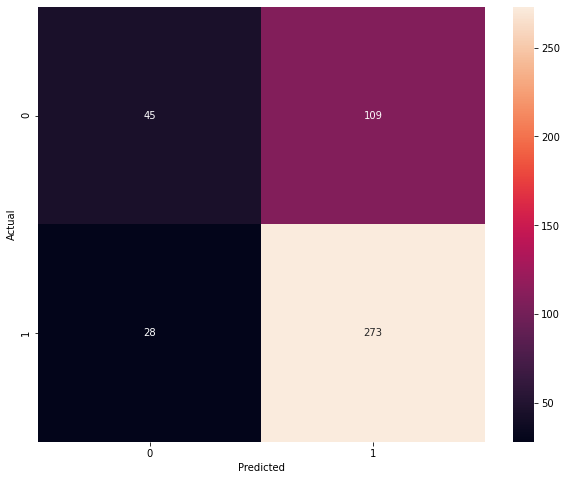

In [107]:
data = {'Actual':y_test_curr_cust.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 273 times out of 301, but it also got 109 false positives.


Best model params

In [108]:
grid_best_model.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

In [109]:
model_ee = ExtraTreesClassifier(max_depth=10,max_leaf_nodes=10,n_estimators=50)
model_ee.fit(X_train_curr_cust,y_train_curr_cust).predict(X_test_curr_cust)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [110]:
def plot_feature_importances(model):
    '''
    Visualization for feature importance
    '''
    n_features = X_train_curr_cust.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), features) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

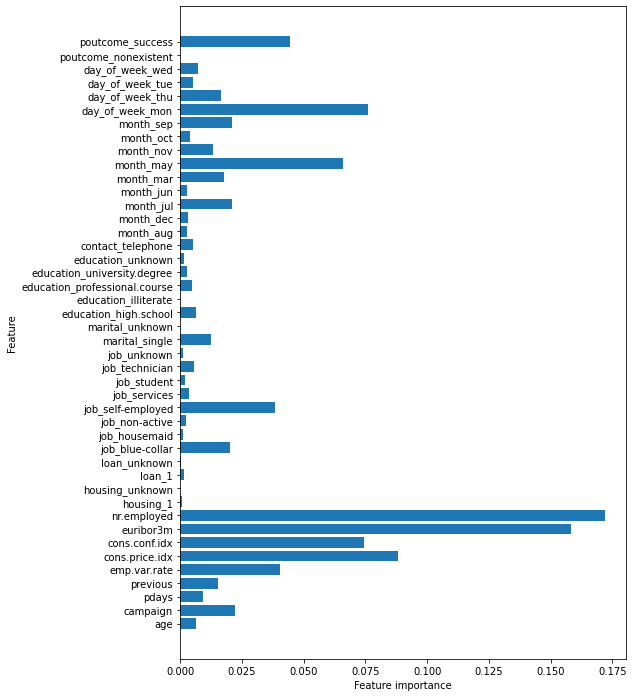

In [111]:
plot_feature_importances(model_ee)

ExtraTreesClassifier got the best results, above graphical description of features which were most influence.

#Summary

During this case study I wanted to analyse bank marketing dataset for classification purposes.

Due to the fact that data has been highly unbalanced, using the standard way of modeling and checking the output based on accurency metric makes no sense. As only 11% of clients decided to take bank term.

To deal to with the unbalanced data I decided to check SMOTE, upsampled and downsampled techniques.

Performance increased after balancing the dataset. 

DecisionTreeClassifier using SMOTE method gives the best F1 score result from those three scenarios.  

I also tested if splitting customers into new and existing ones gives any interesting insights. 

On the dataset related to new clients the F1 score was really low, which means that this model cannot accurately predict getting a bank term by a new customer.

On the dataset related to existing clients the F1 score shows much better results. 

I think such a model might be used to predict getting a bank term by an existing customer.